#Exploratory Analysis -- Yelp

## I. Problem Statement & Background

Due to Yelp’s ability to reach tons of customers and attract crowds of foot traffic, restaurants are always trying to optimize their yelp ratings. However, what are the drivers behind yelp ratings? What separates a two star restaurant from a four star restaurant? Does ambiance contribute to the rating? What about distance from the geographic city center? There are a variety of features that could potentially contribute to businesses’ Yelp rating, and we want to discover what those are and to what degree they matter. At the end we will look at multiple factors and see what correlates most highly to a positive restaurant rating. 

## II. Sources Intend For Use

The data we intend to use comes from the following link: http://www.yelp.com/dataset_challenge. This data has been made available by Yelp for the purpose of the Yelp Dataset Challenge. In particular, the challenge dataset contains the following data: 

1.6M reviews and 500K tips by 366K users for 61K businesses
481K business attributes, e.g., hours, parking availability, ambience.
Social network of 366K users for a total of 2.9M social edges.
Aggregated check-ins over time for each of the 61K businesses

Businesses reviewed in this dataset are located in the following cities around the world:
U.K.: Edinburgh
Germany: Karlsruhe
Canada: Montreal and Waterloo
U.S.: Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison

This data is stored as 5 different datasets, a business dataset, a checkin dataset, a review dataset, a tip dataset, and a user dataset. We have these datasets represented as 5 different pandas dataframes. All except the user dataset can be joined on the primary key business_id to form one big dataset of business information. If necessary we may collect more business data using the Yelp API.


## III. Data Flaws/Weaknesses and Cleaning (4 points)

Though some columns of the data are sparse and are sometimes left empty, such as business attributes, business hours, and neighborhoods located in, the columns we need for our project, mainly the review rating and review text are required fields and are never left empty. 

We decided we wanted to focus our project on only restaurant businesses so using a comprehensive list of all Yelp business categories found here: http://www.localvisibilitysystem.com/2013/07/19/yelp-business-categories-list/

We were able to filter out non-restaurants from our dataset, and we also fixed a potential flaw in the data by filtering out restaurants with no ratings at all, and restaurants which had no text reviews. We ended up with about 110 potential dining categories. These categories included Nightlife, Bars, American, Burgers, Breakfast & Brunch, to name a few.

## IV. Basic Data Characteristics (4 points)

In [1]:
import json
import pandas as pd
import sys
import os
import numpy as np
%matplotlib inline

In [7]:
#Load Biz Dataset into DF
biz_data = []
biz_fn = 'yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json'
with open(biz_fn) as data_file:
    for line in data_file:
        biz_data.append(json.loads(line))
biz_df = pd.DataFrame(biz_data)

### Filtering to keep only Restaurants

Here we read in a document containing all the restaurant related categories on Yelp, and then we filter the business data so that only restaurants for whom all categories are restaurant categories remain. We found that businesses on Yelp can be classified under 1 or more categories and it made the most sense to only allow businesses that were entirely restaurants.

In [6]:
#filtering businesses into restaurants
category_csv = 'restaurantcategories.csv'
all_categories = []
restaurants = []
with open(category_csv) as categories:
    for line in categories:
        all_categories.append(line)
biz_dict = biz_df.to_dict()
all_categories = all_categories[0].split('\r')
for index in biz_dict['categories'].keys():
    if len(biz_dict['categories'][index]) == 0:
        for col in biz_dict.keys():
                del biz_dict[col][index] 
    elif len(biz_dict['categories'][index]) > 0:
        allInCats = True
        for elem in biz_dict['categories'][index]:
            if elem not in all_categories:
                allInCats = False
                break;
        if not allInCats:
            for col in biz_dict.keys():
                del biz_dict[col][index] 
                
res_df = pd.DataFrame(biz_dict)    

NameError: name 'biz_df' is not defined

### Graphing Categories vs. Num Restaurants in that Category

We wanted to get a feel for what the distribution of restaurant types was across different types such as Mexican, Breakfast, Ethnic, etc.

In [8]:
# graphing category counts
import numpy as mp
import matplotlib.pyplot as plt
import operator

cats = {}
for elem in biz_dict['categories']:
    for value in biz_dict['categories'][elem]:
        if value in cats:
            cats[value] = cats[value] + 1
        else:
            cats[value] = 1

plt.bar(range(len(cats)), cats.values(), align='center', width=3)
plt.xticks(range(len(cats)), cats.keys())

plt.show()

NameError: name 'biz_dict' is not defined

In [ ]:
#graphing numreviews vs num restaurants with that num
numReviews = {}
for elem in biz_dict['review_count']:
    value = biz_dict['review_count'][elem]
    if value in numReviews:
        numReviews[value] = numReviews[value] + 1
    else:
        numReviews[value] = 1

plt.hist(numReviews.values())
locs, labels = plt.xticks(range(len(numReviews)), numReviews.keys())
plt.setp(labels, rotation=90)
plt.show()

In [77]:
#box and whisker plots, summary statistics of num reviews
from pylab import *
data = []
for key in numReviews.keys():
    for i in range(0,numReviews[key]):
        data.append(key)

boxplot(data)
figure()
show()

In [ ]:
#Load Checkin Dataset into DF
checkin_data = []
checkin_fn = 'yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_checkin.json'
with open(checkin_fn) as data_file:
    for line in data_file:
        checkin_data.append(json.loads(line))
checkin_df = pd.DataFrame(checkin_data)

In [2]:
#Load review dataset into df
review_data = []
review_fn = 'yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json'
with open(review_fn) as data_file:
    for line in data_file:
        review_data.append(json.loads(line))
review_df = pd.DataFrame(review_data)

In [ ]:
#Load tip dataset into df
tip_data = []
tip_fn = 'yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_tip.json'
with open(tip_fn) as data_file:
    for line in data_file:
        tip_data.append(json.loads(line))
tip_df = pd.DataFrame(tip_data)

In [ ]:
#Load user dataset into df
user_data = []
user_fn = 'yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_user.json'
with open(user_fn) as data_file:
    for line in data_file:
        user_data.append(json.loads(line))
user_df = pd.DataFrame(user_data)

## Review Summary Stats

So we are interested in the summary stats of yelp reviews. To start let us first get an idea of what the distribution of reviews looks like.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2a51a3f90>]], dtype=object)

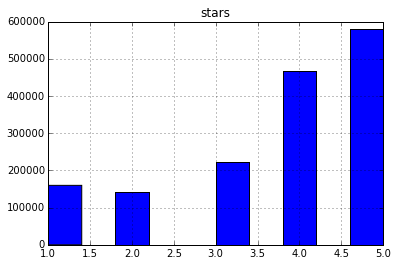

In [3]:
review_df.hist(column='stars')

So this distribution shows that amongst people who actually write reviews there is a pretty heavy skew towards 4-5 star ratings which is pretty intersting. Now let us see if this corresponds to the rating distribution of restaurants.

In [ ]:
biz_df.hist(column='stars')

So this is a much nicer distribution. This distribution is skewed to the right which seems to give some evidence that people tend to give nicer reviews. 

However, let us first get some summary stats of this biz distribution and of the review distribution.

In [6]:
biz_df['stars'].describe()

NameError: name 'biz_df' is not defined

In [7]:
review_df['stars'].describe()

NameError: name 'review_df' is not defined

So looking at the summary stats, it is pretty clear that these are decent distributions where more of the mass is clustered around the mean for the average biz stars versus individual reviews. Now Let us break this down by category which will be pretty useful.

In [9]:
elements = set()
for element_list in biz_df['categories']:
    elements = elements.union(set(element_list))
    
category_dist = {key:[] for key in elements}
for i in range(len(biz_df)):
    row = biz_df.ix[i]
    star = row['stars']
    cats = row['categories']
    for cat in cats:
        category_dist[cat].append(star)

import matplotlib.pyplot as plt
for category in category_dist.keys():
    distribution = category_dist[category]
    if len(distribution) > 1:
        plt.hist(distribution)
        plt.xlabel('{0} stars'.format(category))
        plt.ylabel('Num Stars')
        plt.show()
    else:
        print("Category {0} only has 1 data point. That point is: {1}".format(category,distribution[0]))

NameError: name 'biz_df' is not defined

## V. Surprises (4 Points)

## VI. Next Steps, any Obstacles (2 Points)

One potential obstacle we anticipate is the massive number of reviews contained in our dataset. To process the sheer amount of words we might require Spark.